In [9]:
## Lesson 3 CamVid Tiramisu
%reload_ext autoreload
%autoreload 1
%matplotlib inline

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
#import matplotlib.pyplot as plt

import os
cwd = os.getcwd()

path = Path(cwd + '/data/')
path.ls()

[PosixPath('/home/thor/School/Scripts/data/images'),
 PosixPath('/home/thor/School/Scripts/data/NoBoneImages.txt'),
 PosixPath('/home/thor/School/Scripts/data/AdditionalNotTrustedImagesRemoved.txt'),
 PosixPath('/home/thor/School/Scripts/data/MetalImagesToDuplicate.txt'),
 PosixPath('/home/thor/School/Scripts/data/masks'),
 PosixPath('/home/thor/School/Scripts/data/NormalizedData'),
 PosixPath('/home/thor/School/Scripts/data/valid.txt'),
 PosixPath('/home/thor/School/Scripts/data/NormalizedFullDatasett.zip'),
 PosixPath('/home/thor/School/Scripts/data/MetalImages.txt')]

In [10]:
path_img = path/'images'
img_names = get_image_files(path_img)
img_names[:10]

[PosixPath('/home/thor/School/Scripts/data/images/MAGNA_82_73.429CL_4.57361kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_8_60.2261CL_2.25115kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_76_-1CL_0.186004kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_88_45.3154CL_2.05693kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_72_90.1985CL_3.66946kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_20_85.8653CL_3.4788kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_60_81.3607CL_3.91723kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_80_-1CL_0.864946kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_89_-1CL_0.015531kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_44_-1CL_0.143741kg.tiff')]

In [11]:
path_lbl = path/'masks'
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/home/thor/School/Scripts/data/masks/MAGNA_82_73.429CL_4.57361kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/masks/MAGNA_8_60.2261CL_2.25115kg.tiff'),
 PosixPath('/home/thor/School/Scripts/data/masks/MAGNA_76_-1CL_0.186004kg.tiff')]

In [12]:
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.0, max_lighting=None, max_warp=0.2, p_affine=0.75, p_lighting=0.0)
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (dihedral_affine), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True)])

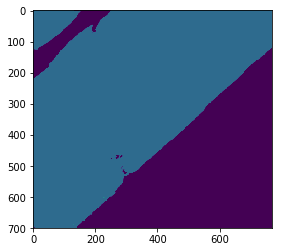

In [217]:
# Function that returns an image from its url
def get_img(img_url):
    return open_image(img_url)

# Function that displays many transformations of an image
def plots_of_one_image(img_url, tfms, rows=1, cols=3, width=15, height=5, **kwargs):
    img = get_img(img_url)
    img = img.apply_tfms(tfms, **kwargs)
    plt.figure()
    plt.imshow(img.data[0])
    plt.show()
                               
# for transform in tfms:
plots_of_one_image('/home/thor/School/Scripts/data/masks/MAGNA_3_86.3626CL_3.97524kg.tif',
                   RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True))
#                    RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-180.0, 180.0)}, p=1.0, resolved={}, do_run=True, is_random=True))

In [24]:
## All metal images:
metal = ['/home/thor/School/Scripts/data/masks/MAGNA_3_86.3626CL_3.97524kg.tiff',
'/home/thor/School/Scripts/data/masks/MAGNA_20_78.9422CL_0.960883kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_48_-1CL_0.437527kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_49_-1CL_0.440395kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_50_-1CL_0.317512kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_51_-1CL_0.453667kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_52_-1CL_0.360127kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_53_-1CL_0.446551kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_54_-1CL_0.441927kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_55_-1CL_0.454831kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_56_-1CL_0.446517kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_57_-1CL_0.442111kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_58_-1CL_0.453068kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_59_-1CL_0.328768kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_60_-1CL_0.439103kg.tiff', 
'/home/thor/School/Scripts/data/masks/MAGNA_61_83.7706CL_3.88116kg.tiff']

for name in metal: # lbl_names:
    img = open_image(name, div=False)
    
    if 3 in np.unique(img.data):
        print(name)
#         print(np.unique(img.data))
#         print(len(img.data[img.data==3]))
#         print(img.data[img.data==3])
#         print(img.data.size())
        
        plt.figure(figsize = (20,20))
        plt.imshow(img.data[0])
        plt.show()

        #open_image(name, div=True).show(figsize=(5,5))


In [39]:
# open_image(name, div=True).show(figsize=(5,5))
# plt.figure(figsize = (20,20))
# plt.imshow(img.data[0])
# plt.show()

In [23]:
from skimage.measure import regionprops, label

count = 0
for idx, name in enumerate(lbl_names):
    img = open_image(name, div=False, convert_mode=None)
    
    data = img.data[0].numpy().astype(int)
            
#     pixel_count = len(data[data == 2])
#     if pixel_count > 400:
#         print(name)
#         print("Has {} contaminant pixels".format(pixel_count))
        
    data[data == 1] = 0
#     data[data == 2] = 0  # Set the bones as background

    labels = label(data, background=0) # same image_binary as above
    regions = regionprops(labels)
    contaminant_count = len(regions)
    if contaminant_count > 3:
        print(name)
        print("Found {} metal groups".format(contaminant_count))

        plt.figure(figsize = (15,15))
        plt.imshow(img.data[0])
        plt.show()
        
        

In [22]:
# No contaminant found in these image

print("No contaminant found in these images")
count = 0
for idx, name in enumerate(lbl_names):
    img = open_image(name, div=False)
    
    values = np.unique(img.data)
    if ((3 not in values) and (2 not in values)):
        print(name)
        count += 1
        

No contaminant found in these images
/home/thor/School/Scripts/data/masks/MAGNA_82_73.429CL_4.57361kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_60_81.3607CL_3.91723kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_24_62.691CL_5.62494kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_32_83.5199CL_3.1396kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_86_78.183CL_3.3554kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_48_79.0586CL_2.77403kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_12_-1CL_2.80497kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_22_83.1881CL_3.17582kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_73_78.822CL_3.71024kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_21_-1CL_0.901515kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_16_81.8749CL_3.41197kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_2_80.2382CL_3.37124kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_46_95.1205CL_1.10004kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_21_70.9793CL_

/home/thor/School/Scripts/data/masks/MAGNA_32_82.2589CL_3.30396kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_75_-1CL_0.00603545kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_1_68.5561CL_3.5819kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_41_-1CL_9.99998e-06kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_92_78.0684CL_3.20538kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_56_76.0499CL_3.18102kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_5_85.4797CL_3.41677kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_67_79.9232CL_2.91653kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_22_82.7743CL_3.45761kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_59_-1CL_0.147816kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_33_72.1865CL_3.28548kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_79_-1CL_0kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_73_-1CL_0.0486509kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_34_74.1451CL_3.3945kg.tiff
/home/thor/School/Scripts/data/

/home/thor/School/Scripts/data/masks/MAGNA_2_80.4027CL_3.51178kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_12_74.5377CL_3.50103kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_99_86.2618CL_3.49147kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_3_79.6144CL_3.34081kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_68_78.1764CL_4.12357kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_7_-1CL_0.0319293kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_3_79.841CL_3.80364kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_29_80.7447CL_3.92842kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_99_79.4247CL_3.20061kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_45_75.1671CL_3.47745kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_56_78.8413CL_6.21299kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_62_-1CL_0.52689kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_23_83.9424CL_3.34123kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_22_-1CL_0.0351258kg.tiff
/home/thor/School/Scri

/home/thor/School/Scripts/data/masks/MAGNA_23_80.975CL_3.58305kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_84_82.7007CL_3.42278kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_8_82.839CL_3.66776kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_78_-1CL_0.467819kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_45_76.9965CL_3.03041kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_50_79.8328CL_3.31195kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_98_-1CL_0.00926783kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_9_74.9768CL_3.44603kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_33_74.9812CL_3.9988kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_61_72.6006CL_7.00485kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_72_-1CL_0.0502995kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_4_87.0527CL_3.52707kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_85_79.9192CL_4.14518kg.tiff
/home/thor/School/Scripts/data/masks/MAGNA_73_81.8303CL_3.28519kg.tiff
/home/thor/School/Scr